# Code exercises

In [38]:
import numpy as np
import matplotlib.pyplot as plt

Exercise 8-1.
The inverse of the inverse is the original matrix; in other words, A
−1 −1
= A. This is
analgous to how 1/ 1/a = a. Illustrate this using Python.


In [39]:
A = np.random.randn(4, 4)

Ainv = np.linalg.inv(A)
A2inv = np.linalg.inv(Ainv)

print(f'{A} and {A2inv} is the same')

[[-0.11166693 -2.11734526 -1.2116707  -1.29302915]
 [ 1.65148936  0.89369973  0.83222934 -2.18887872]
 [-0.61498315 -0.06991224 -0.99519303  1.21374566]
 [ 0.67414011  0.02125863 -2.18101199  1.04287057]] and [[-0.11166693 -2.11734526 -1.2116707  -1.29302915]
 [ 1.65148936  0.89369973  0.83222934 -2.18887872]
 [-0.61498315 -0.06991224 -0.99519303  1.21374566]
 [ 0.67414011  0.02125863 -2.18101199  1.04287057]] is the same


Exercise 8-2.
Implement the full algorithm described in “Inverting Any Square Full-Rank Matrix”
on page 134 and reproduce Figure 8-3. Of course, your matrices will look different
from Figure 8-3 because of random numbers, although the grid and identity matrices
will be the same

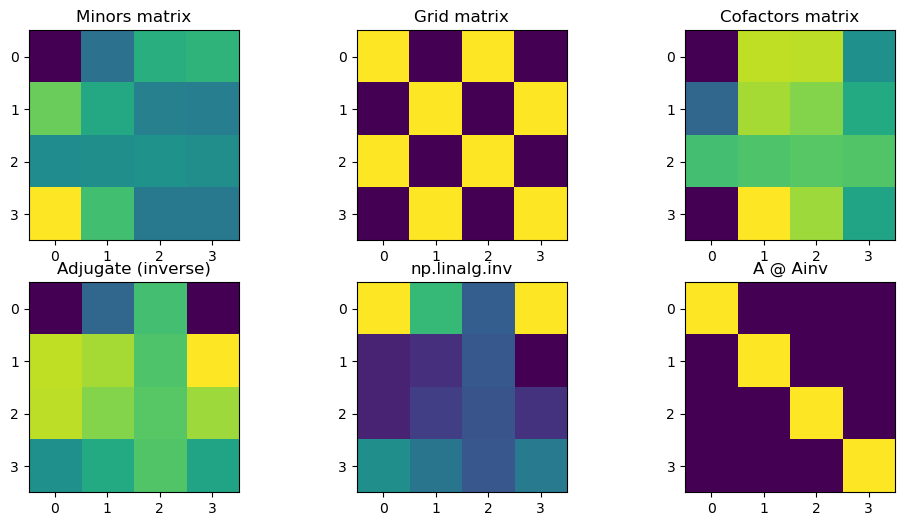

In [40]:
A = np.random.randn(4, 4) @ np.random.randn(4, 4)
rank_of_A = np.linalg.matrix_rank(A)

minor_matrix = np.zeros(A.shape)
grid_matrix = np.zeros(A.shape) 

for i in range(A.shape[0]) : 
    for j in range(A.shape[1]) : 
        grid_matrix[i, j] = (-1) ** (i + j) 

        sub_matrix = np.delete(np.delete(A, i, axis = 0), j, axis = 1)
        minor_matrix[i, j] = np.linalg.det(sub_matrix)

cofactor_matrix = minor_matrix * grid_matrix
adjugate_matrix = cofactor_matrix.T

fig, ax = plt.subplots(nrows = 2, ncols= 3, figsize = (12, 6))

# minor matrix 
ax[0][0].imshow(minor_matrix)
ax[0][0].set_title('Minors matrix')

ax[0][1].imshow(grid_matrix)
ax[0][1].set_title('Grid matrix')

ax[0][2].imshow(cofactor_matrix)
ax[0][2].set_title('Cofactors matrix')

ax[1][0].imshow(adjugate_matrix)
ax[1][0].set_title('Adjugate (inverse)')

ax[1][1].imshow(np.linalg.inv(A))
ax[1][1].set_title('np.linalg.inv')

ax[1][2].imshow(A @ np.linalg.inv(A))
ax[1][2].set_title('A @ Ainv')

plt.show()

Exercise 8-3.
Implement the full-inverse algorithm by hand for a 2 × 2 matrix using matrix
elements a, b, c, and d. I don’t normally assign hand-solved problems in this book,
but this exercise will show you where the shortcut comes from. Remember that the
determinant of a scalar is its absolute value.

In [41]:
def inverse_of_matrix_2x2(matrix :np.array) : 
    if matrix.shape[0] != 2 or matrix.shape[1] != 2 : return None 

    a = matrix[0, 0]
    b = matrix[0, 1]
    c = matrix[1, 0]
    d = matrix[1, 1]

    if np.linalg.det(A) == 0 : return None 

    return 1 / np.linalg.det(A) * np.array([[d, -b], [-c, a]])



In [42]:
A = np.random.randn(2, 2)
Ainv = np.linalg.inv(A)
m_Ainv = inverse_of_matrix_2x2(A)
print(f'My function: {m_Ainv}')
print(f'''Numpy's function: {Ainv} ''')

My function: [[-0.29136618 -0.96748435]
 [ 0.90196445 -0.95382304]]
Numpy's function: [[-0.29136618 -0.96748435]
 [ 0.90196445 -0.95382304]] 


Exercise 8-4.
Derive the right-inverse for wide matrices by following the logic that allowed us to
discover the left-inverse. Then reproduce Figure 8-4 for a wide matrix. (Hint: start
from the code for the left-inverse and adjust as necessary.)

- Ma trận rộng (wide matrix) thực hiện phép tính $ WW^T$ là một matrix full-row rank. Khi đó ta có công thức : $$ (WW^T) (WW^T) ^{-1} = I \\ \Leftrightarrow W (W^T)(WW^T)^{-1} = I \\ \Leftrightarrow WR = I  $$ 

In [43]:
W = np.random.randint(-10, 11, size = (4, 40))

WWT = W @ W.T 
R = W.T @ np.linalg.inv(WWT)



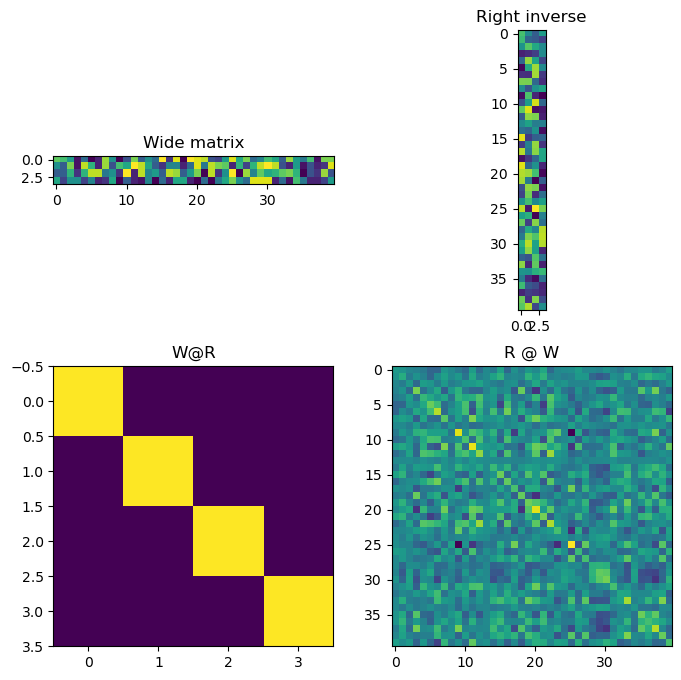

In [44]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (8, 8))

ax[0][0].imshow(W)
ax[0][0].set_title('Wide matrix')

ax[0][1].imshow(R)
ax[0][1].set_title('Right inverse')

ax[1][0].imshow(W @ R)
ax[1][0].set_title('W@R')

ax[1][1].imshow(R @ W)
ax[1][1].set_title('R @ W')

plt.show()

Exercise 8-5.
Illustrate in Python that the pseudoinverse (via np.linalg.pinv) equals the full
inverse (via np.linalg.inv) for an invertible matrix. Next, illustrate that the pseu‐
doinverse equals the left-inverse for a tall full column-rank matrix, and that it equals
the right-inverse for a wide full row-rank matrix.

In [45]:
# full inverse matrix 
A = np.random.randint(0, 16, size = (5, 5))

Ainv = np.linalg.inv(A)
Apinv = np.linalg.pinv(A)


In [46]:
# left-inverse matrix 
L = np.random.randint(0, 16, size = (8, 2))

Linv = np.linalg.inv(L.T @ L) @ L.T
Lpinv = np.linalg.pinv(L)


In [47]:
R = np.random.randint(0, 16, size = (2, 8))

Rinv = R.T @ np.linalg.inv(R @ R.T)
Rpinv = np.linalg.pinv(R)

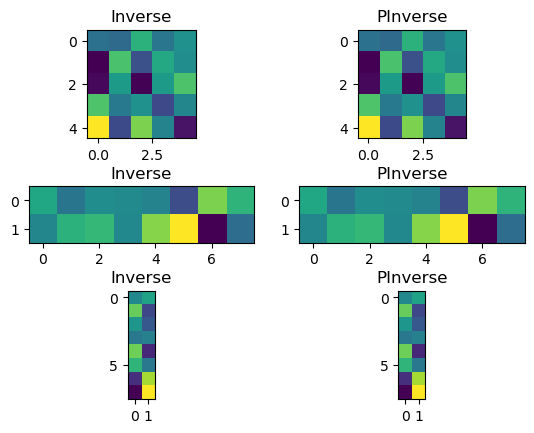

In [48]:
fig, ax = plt.subplots(nrows = 3, ncols = 2)

lst = [Ainv, Apinv, Linv, Lpinv, Rinv, Rpinv]

for i in range(3) : 
    ax[i][0].imshow(lst[ 2 * i ])
    ax[i][0].set_title('Inverse')

    ax[i][1].imshow(lst[2 * i + 1])
    ax[i][1].set_title('PInverse')

plt.show()

Exercise 8-6.
The LIVE EVIL rule applies to the inverse of multiplied matrices. Test this in code
by creating two square full-rank matrices A and B, then use Euclidean distance to compare (1) AB −1, (2) A
−1B
−1, and (3) B
−1A
−1. Before starting to code, make a
prediction about which results will be equal. Print out your results using formatting
like the following (I’ve omitted my results so you won’t be biased!):
Distance between (AB)^-1 and (A^-1)(B^-1) is ___
Distance between (AB)^-1 and (B^-1)(A^-1) is ___
As an extra challenge, you can confirm that the LIVE EVIL rule applies to a longer
string of matrices, e.g., four matrices instead of two.


In [49]:
A = np.random.rand(3, 3) 
B = np.random.rand(3, 3)

ABinv = np.linalg.inv(A @ B)
AinvBinv = np.linalg.inv(A) @ np.linalg.inv(B)
BinvAinv = np.linalg.inv(B) @ np.linalg.inv(A)

print(f'Distance between (AB)^ -1 and (A^-1 B ^-1) is {ABinv - AinvBinv}')
print(f'Distance between (AB)^-1 and (B^-1)(A^-1) is {ABinv - BinvAinv}')

Distance between (AB)^ -1 and (A^-1 B ^-1) is [[ 1.51511268 -4.82554977 -6.37737557]
 [ 8.23374933 -1.1446101   6.3074877 ]
 [-7.75491199  4.83533854 -0.37050258]]
Distance between (AB)^-1 and (B^-1)(A^-1) is [[-7.10542736e-15  1.15463195e-14  2.66453526e-15]
 [ 7.10542736e-15 -1.24344979e-14 -3.55271368e-15]
 [-1.88737914e-15  2.66453526e-15  1.33226763e-15]]


Exercise 8-7.
Does the LIVE EVIL rule also apply to the one-sided inverse? That is, does
$(T^TT)^-1 = T^{-T}T^{-1} $As with the previous exercise, make a prediction and then test
it in Python

In [50]:
# T = np.random.randn(4, 5)

# op1 = np.linalg.inv(T.T @ T)

# op2 = np.linalg.inv(T) @ np.linalg.inv(T.T)

# print(f'Option 1 is {op1 == op2} option 2')


Exercise 8-8.
Write code to reproduce Figure 8-6. Start by copying the code from Exercise 7-3.
After reproducing the figure, make the transformation matrix noninvertible by set‐
ting the lower-left element to 1. What else needs to be changed in the code to prevent
errors?

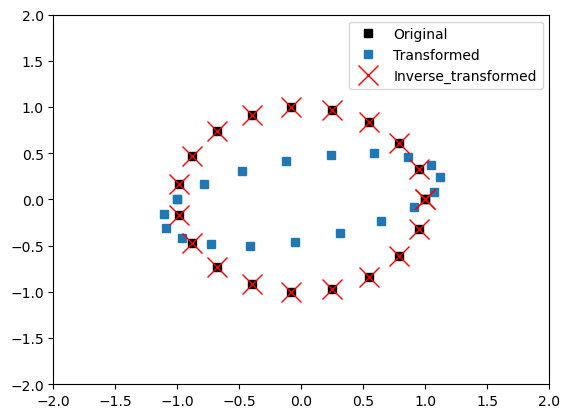

In [51]:
rad = np.linspace(0, 2 * np.pi, 20 )

o_point = np.vstack((np.cos(rad), np.sin(rad)))
T = np.array([
    [-1, 0.5], 
    [0,  0.5]
])

trans_point = T @ o_point
inv = np.linalg.inv(T)
trans_inv = inv @ trans_point

fig, ax = plt.subplots()

ax.plot(o_point[0, :], o_point[1, :], 'ks' ,label = 'Original')

ax.plot(trans_point[0, :], trans_point[1, :],'s', label = 'Transformed' )

ax.plot(trans_inv[0, :], trans_inv[1, :], 'rx', markersize = 15, label = 'Inverse_transformed')
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
plt.legend()
plt.show()

Exercise 8-9.
This and the next exercise will help you explore the matrix inverse and its risk of
numerical instability, using the Hilbert matrix. Start by creating a Hilbert matrix.
Write a Python function that takes an integer as input and produces a Hilbert matrix
as output, following Equation 8-1. Then reproduce Figure 8-5.
I recommend writing your Python function using a double for loop over the rows
and columns (i and j matrix indices), following the math formula. Once you con‐
firm that the function is accurate, you can optionally challenge yourself to rewrite
the function without any for loops (hint: outer product). You can confirm the
accuracy of your function by comparing it to the hilbert function, which is in the
scipy.linalg library

In [52]:
N = 10

def hilbert_matrix(N : int) : 
    res = np.zeros((N, N))

    for i in range(N) : 
        for j in range(N) : 
            res[i, j] = 1 / (i + j + 1)

    return res

hil_matrix = hilbert_matrix(N)
hil_matrix_inv = np.linalg.inv(hil_matrix)


In [53]:
from scipy.linalg import hilbert

hil_2_matrix = hilbert(N)
hil_2_matrix_inv = np.linalg.inv(hil_2_matrix)

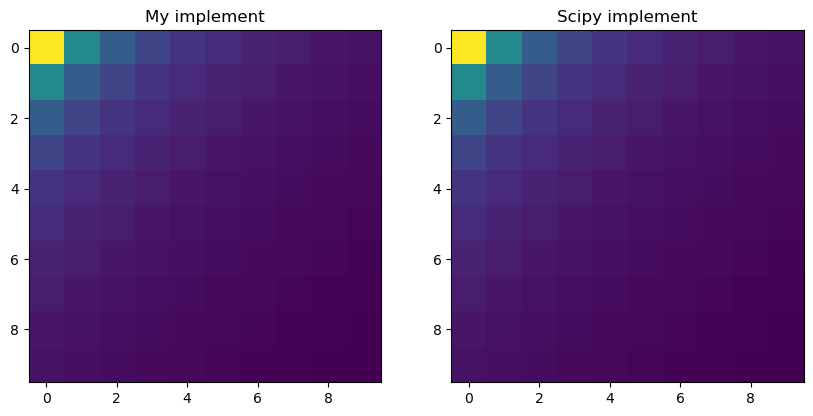

In [54]:
fig, ax = plt.subplots(ncols = 2, figsize = (10,  5))

ax[0].imshow(hil_matrix)
ax[0].set_title('My implement')

ax[1].imshow(hil_2_matrix)
ax[1].set_title('Scipy implement')

plt.show()

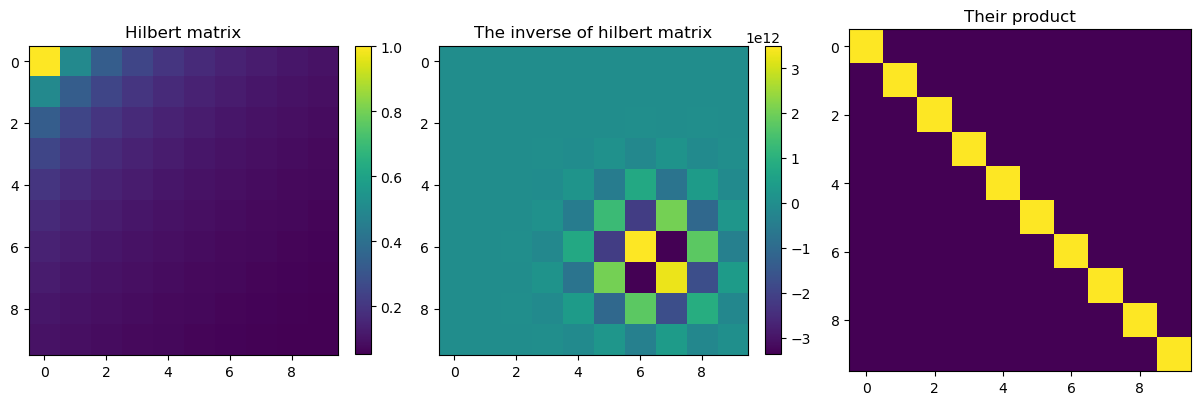

In [55]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))

h1 = ax[0].imshow(hil_matrix, vmin = np.min(hil_matrix), vmax = np.max(hil_matrix))
ax[0].set_title('Hilbert matrix')
fig.colorbar(h1, ax = ax[0], fraction = .045)

h2 = ax[1].imshow(hil_matrix_inv, vmin = np.min(hil_matrix_inv), vmax = np.max(hil_matrix_inv))

ax[1].set_title('The inverse of hilbert matrix')
fig.colorbar(h2, ax = ax[1], fraction = .045)

ax[2].imshow(hil_matrix @ hil_matrix_inv)
ax[2].set_title('Their product')

plt.show()

Exercise 8-10.
Using your Hilbert matrix function, create a Hilbert matrix, then compute its inverse
using np.linalg.inv, and compute the product of the two matrices. That product
should equal the identity matrix, which means the Euclidean distance between that product and the true identity matrix produced by np.eye should be 0 (within com‐
puter rounding error). Compute that Euclidean distance.
Put this code into a for loop over a range of matrix sizes ranging from 3 × 3 to
12 × 12. For each matrix size, store the Euclidean distance and the condition number
of the Hilbert matrix. As I wrote earlier, the condition number is a measure of the
spread of numerical values in the matrix, and can be extracted using the function
np.linalg.cond.
Next, repeat the previous code, but using a Gaussian random-numbers matrix instead
of the Hilbert matrix.
Finally, plot all of the results as shown in Figure 8-7. I plotted the distance and
condition number in log scale to facilitate visual interpretation.Please feel inspired to continue exploring linear algebra using this exercise! Try
plotting the Hilbert matrix times its inverse (consider adjusting the color scaling),
using larger matrices or different special matrices, extracting other properties of the
matrix like rank or norm, etc. You’re on an adventure in the wonderful land of linear
algebra, and Python is the magic carpet that whisks you across the landscape.


In [62]:
dis_to_id = np.zeros((10, 2))
matrix_cond = np.zeros((10, 2))

idx = np.linspace(3, 12,  10)

for i in range(len(idx)) : 
    rand_matrix = np.random.randn(int(idx[i]), int(idx[i]))
    rand_inv = np.linalg.inv(rand_matrix)
    dis_to_id[i, 0] = np.sqrt(np.sum((rand_matrix @ rand_inv - np.eye(int(idx[i]))) ** 2))
    matrix_cond[i, 0] = np.linalg.cond(rand_matrix)


    hil_matrix = hilbert(int(idx[i]))
    hil_inv = np.linalg.inv(hil_matrix)
    dis_to_id[i, 1] = np.sqrt(np.sum((hil_matrix @ hil_inv - np.eye(int(idx[i]))) ** 2))
    matrix_cond[i, 1] = np.linalg.cond(hil_matrix)



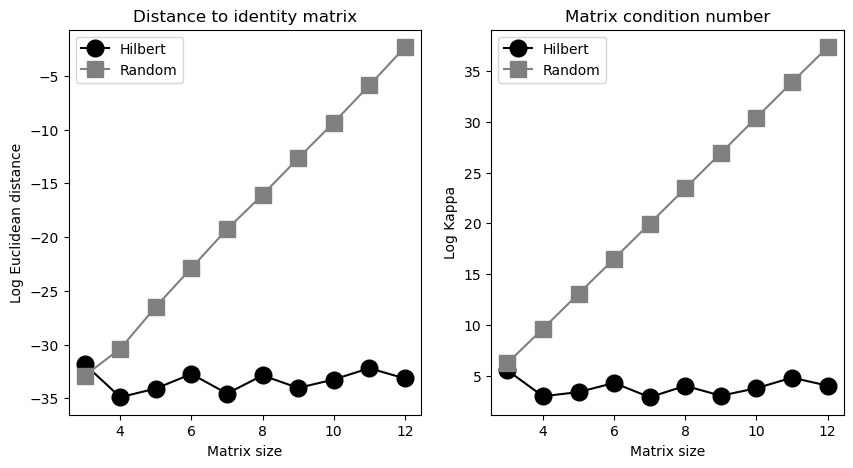

In [63]:
fig, ax = plt.subplots(ncols = 2, figsize = (10, 5))

h = ax[0].plot(idx, np.log(dis_to_id), 's-', markersize = 12 )
h[0].set_color('k')
h[0].set_marker('o')
h[1].set_color('grey')

ax[0].legend(['Hilbert', 'Random'])
ax[0].set_title('Distance to identity matrix')
ax[0].set_xlabel('Matrix size')
ax[0].set_ylabel('Log Euclidean distance')

h = ax[1].plot(idx, np.log(matrix_cond), 's-', markersize = 12)
h[0].set_color('k')
h[0].set_marker('o')
h[1].set_color('grey')

ax[1].legend(['Hilbert', 'Random'])
ax[1].set_title('Matrix condition number')
ax[1].set_xlabel('Matrix size')
ax[1].set_ylabel('Log Kappa')

plt.show()